# Homework 1: Linear Systems Part I

## General Instructions
 
* To pass this assignment requires to complete the present Jupyter notebook by
    + providing correct answers to all the theoretical exercises, and by
    + providing complete and runnable computer code producing the correct results to all the computational problems.

* For the theoretical exercises, please include intermediate steps to
  explain how you arrive at your solution.
* Don't overengineer your code, keep it as simple and readable as possible   and provide short code comments to help other people understanding your     code.
* Please provide also a short summary and discussion of your results 
  including the requested output (e.g., tables, graphs etc.).

* Up to 3 students can jointly submit the solutions (4 students if at
  least one is an exchange student) **Only 1 student from each group** 
  is supposed to submit them.  

##### Deadline for submission of your solutions is **12th of September**.


###  Happy coding!

**And before we start:**

Executing the following cell loads a non-default css style for the notebook. 
Make sure that you download the corresponding css file  `tmas4215.css` from the `lab/styles` Blackbord folder. Note that the following code snippet assumes that the file resides inside the folder `../styles/` relative to the folder where you stored this notebook on you computer.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

### Useful code snippets

We provide a few of code snippets to get you
started in Python. Three dots $\ldots$ indicate places where you have
to fill in code. We start with importing the necessary scientific libraries
and define a name alias for them.

In [1]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

## Problem 1
Provide a complete proof of Theorem 2 from Lecture 2,
following the outline provided there. 

### Theorem 2
Let $A \in \mathbb{R}^{n,n}$ with $n > 2$ and assume that every leading
principal submatrix of order $k$ with $1 \leq k \leq n − 1$ is invertible. Then $A$
admits a LU factorization, where $L$ is unit lower triangular of order $n$, and
$R$ is upper triangular of order $n$.



### Proof

#### Base-case $n=2$:

Assuming that $A$ fullfills the assumption of the theorem
and we write it as

\begin{equation}
    A=\begin{pmatrix} a & b \\ c & d \end{pmatrix}
\end{equation}

We wish to establish the existence of
\begin{equation}
    L=\begin{pmatrix} 1 & 0 \\ m & 1 \end{pmatrix} , \quad
    U=\begin{pmatrix} u & v \\ 0 & \eta \end{pmatrix}
\end{equation}

Such that $LU = A$. 

This gives the 4. equations given below
\begin{equation}
    u = a, \quad v = b, \quad mu = c, \quad mv + \eta = d
\end{equation}

with soulution

\begin{equation}
    u = a, \quad v = b, \quad m = \frac{c}{a}, \quad \eta = d - \frac{bc}{a}
\end{equation}

as long as $a \neq 0$



#### Induction step

Assuming that the theorem is proven for all matrices of order $k$, $2 \leq k \leq n$, 
and suppose that $A \in \mathbb{R}^{n+1,n+1}$ , satisfies the assumptions of the
theorem.

Inspired by the case $n = 2$, we rewrite $A$ as a block matrix

\begin{equation}
    A=\begin{pmatrix} A^{(n)} & \mathbf{b} \\ \mathbf{c}^\top   & d \end{pmatrix}
\end{equation}

where $A^{(n)} \in \mathbb{R}^{n, n}$ is a notsingular matrix. Here $\mathbf{b}$ and $\mathbf{c}$ are column vectors, and $\eta$ is a scalar.

Now assuming that $A$ satisfies the assumptions of the theorem and that the
theorem is already proved for $n$. We want to show that $A$ admits a LU factorization and make the ansatz

\begin{equation}
    L=\begin{pmatrix} L^{(n)} & \mathbf{0} \\ \mathbf{m}^\top   & 1 \end{pmatrix} , \quad
    U=\begin{pmatrix} U^{(n)} & \mathbf{v} \\ \mathbf{0}^\top   & \eta \end{pmatrix}
\end{equation}

Like for $n=2$ we get 4. equations
\begin{equation}
    A^{(n)} = L^{(n)}U^{(n)}, \quad \mathbf{b} = L^{(n)} \mathbf{v}, 
    \quad \mathbf{m}^\top U^{(n)}  = \mathbf{c}^\top, 
    \quad \mathbf{m}^\top \mathbf{v} + \eta = d
\end{equation}

The first equation $A^{(n)} = L^{(n)}U^{(n)}$ we alredy know by assumtion, but also by assumtion $A^{(n)}$ is invertible. So $L^{(n)}$ and $U^{(n)}$ are invertible, and with this we can solve the rest of the equations like this.

\begin{equation}
   \mathbf{v} = (L^{(n)})^{-1} \mathbf{b}, 
    \quad \mathbf{m}  = (U^{(n)})^{-\top} \mathbf{c}, 
    \quad \eta = d - \mathbf{m}^\top \mathbf{v}
\end{equation}

By this $A$ admits a LU factorization.

Now it remains to prove that if $A$ admits a LU factorization, then every leading
principal submatrices of order $k$ with $1 \leq k \leq n$ is invertible.

First if $A$ is nonsingular, then
\begin{equation}
   \det{A} = \det{LU} = \det{L} \cdot \det{U} = \det{U} = \prod_{i=1}^{n+1} u_{ii} \neq  0
\end{equation}

Because $L$ and $U$ are diagonal matrtices and $l_{ii}=1$ for $i = 1, 2, ... ,n, n+1$, and $A$
nonsingular. It follows that 

\begin{equation}
   \det{A_i}= \prod_{j=1}^{i} u_{jj} \neq  0
\end{equation}

for $i = 1, 2, ... ,n$, and that matrices $A_i$, $i = 1, 2, ... ,n$, are invertible.

If $A$ is singular we can assume that (at least) one diagonal entery of $U$ is equal to zero. Denoteing the null entry by $u_{kk}$ with minimum indek $k$. Thanks to  the equation for $\det(A)$, the factorization can be computed without troubls until the $k+1$-step. From her on, 
since $U^{(k)}$ is singular, existene and uniquness of the vector $\mathbf{m}^\top$ are certainly lost, and, thus, the same holds for the uniquness of the factorization. In order for this not to occur before the process has factorized the whole of $A$, the $u_{kk}$ entries must all be nonzero up to the index $k=n$ included, and thus, due to the equation for $\det(A)$, all pricipal submatrices $A_k$ must be nonsigular for $k=1,2, ... , n$.



## Problem 2

Given matrix $A \in \mathbb{R}^{n,n}$ and $\boldsymbol{b} \in \mathbb{R}^n$,
the goal of this problem set is to compute the solution $\boldsymbol{x}$
to the linear system $A \boldsymbol{x} = \boldsymbol{b}$ numerically
by implementing the algorithms $A = LU$ factorization (whenever possible), and the backward and forward substitution steps in ```Python```.

As a preliminary step, please make sure that you have import ```numpy```  as ```np``` by executing the cell right under "Useful code snippets".

**a)** Implement a ```Python``` function ```forward_sub```:

In [6]:
def forward_sub(LU, b, P):
    """Given a lower triangular matrix L and right-side vector b,
    compute the solution vector y solving Ly = b."""
    # P is the permutasjon vector, LU is the matrix containg both L and U
    n = len(LU)
    y = np.zeros(n) # make empty y
    y[0] = b[P[0]] # first element of b sorted as P
    for i in range(1, n):
        y[i] = b[P[i]] - LU[P[i], 0:i] @ y[0:i] # rest of the elemets
    return y

**b)** Next, implement a ```Python``` function ```backward_sub```:

In [7]:
def backward_sub(LU, y, P):
    """Given a lower triangular matrix U and right-side vector y,
    compute the solution vector x solving Ux = y."""
     # P is the permutasjon vector, LU is the matrix containg both L and U
    n = len(LU)
    x = np.zeros(n)
    x[n-1] = y[n-1] / LU[P[n-1], n-1] # last element
    for i in range(n-1, 0, -1):
        x[i-1] = (y[i-1] - LU[P[i-1], i:] @ x[i:]) / LU[P[i-1], i-1]   #rest of the elements
    return x

**c)** Now, implement a Python function which computes for a given matrix $A \boldsymbol{R}^{n,n}$ the $LU$ factorization of $A = LU$ ((if possible).
You can either base your implemenentation on the Banachiewicz or Crout method (explain in Lecture 3) or any method
you might dig up from the literature.
If you want, you can take some inspiration from the reference **YEB**, Chapter 3.3, see Program 4, 5, 6.

If the factorization fails without permutating $A$, you should at least be so kind
and raise an ```Exception```, see [Python 3 tutorial, 8. Errors and Exceptions](
https://docs.python.org/3/tutorial/errors.html#errors-and-exceptions).
More specifically, you can simply raise an [NotImplementedError](https://docs.python.org/3/library/exceptions.html#NotImplementedError) exception.

Of course, you can also implement the full $PA = LU$ decomposition if you don't want to throw Exceptions around :).

In [8]:
def lu_factor(A):
    LU = A.copy() #saving space by storing L and U in the same matrix, and I don't want to save A as it is.
    n = len(LU)
    P = np.arange(n) #permutatiun vector
    for k in range(n-1):
        pivot = np.argmax(abs(LU[P[k:], k])) + k #finding the pivot, by sorting LU as P from k.
        P[k], P[pivot] = P[pivot], P[k] #change posision of elemet pivot and k in P.
        # we know L[i,i] = 1, and that U[k, i] = "LU[k, i]" from the last step.
        # finding multiplicator
        LU[P[k+1:], k] = LU[P[k+1:], k] / LU[P[k], k]
        # elimination
        LU[P[k+1:], k+1:] = LU[P[k+1:], k+1:] - np.outer(LU[P[k+1:], k], LU[P[k], k+1:])
    return P, LU

**d)** Next, combine the Python functions you just implemented in a)-b) to provide
solver for the linear system $A \boldsymbol{x} = \boldsymbol{b}$ based on
a given $A = LU$ factorization. 

In [9]:
def lu_solve(LU, P, b):
    # Step 1: Solve Ly = b using forward substitution
    y = forward_sub(LU, b, P) # sort b as P
    # Step 2: Solve Ux = y using backward substitution
    x = backward_sub(LU, y, P)
    return x

**e)** Finally, write a ```linear_solve``` function  by simply combining your ```lu_factor``` and ```lu_solve```. 

In [10]:
def linear_solve(A, b):
    # ...
    P, LU = lu_factor(A)
    x = lu_solve(LU, P, b)
    
    return x

**f)** Use you brand new `linear_solve` function to compute the solution to a non-trivial linear system. Here non-trivial means that $n > 4$ :) and a non-zero right-hand side $\boldsymbol{b}$.

*Hint*: To check whether your code computes the "exact" result, you can use the 
method of **manufactured solution**. In the case of linear systems $A \boldsymbol{x} = \boldsymbol{b}$ this means that for **given/chosen** matrix $A$ and solution vector $\boldsymbol{x}$, you simply compute the resulting right-hand side vector 
$\boldsymbol{b} = A \boldsymbol{x}$ to construct an example where you know the solution.
When you now solve $A\boldsymbol{x} = \boldsymbol{b}$ starting from $A$, $\boldsymbol{b}$, your implementation should return the correct $\boldsymbol{x}$.

In [11]:
#test

n = 5 # give a n > 4

A = np.random.rand(n*n).reshape((n,n)) * 10
print("A =\n", A)
x = np.random.rand(n) * 10
print("x = ", x)
b = A @ x
print("b = ", b)
print("testing...")
x_test = linear_solve(A, b)
print("x_test =  ", x_test)
print("||x - x_test ||_2 = ", la.norm(x - x_test, 2))




A =
 [[1.52988599 9.25166805 1.45007044 2.81932896 5.67538078]
 [9.42963215 1.17504566 9.40495921 4.46232752 7.08461432]
 [3.59622133 1.27181317 1.26234231 9.72513534 9.37662684]
 [0.13852987 3.7683606  3.8544754  0.22213983 3.55615931]
 [1.27735651 4.96638516 0.16944097 5.10974535 6.81772521]]
x =  [2.95894696 3.4464804  2.09988659 0.32779289 5.1997356 ]
b =  [69.892163   90.00174143 69.61889358 40.05534866 58.37729268]
testing...
x_test =   [2.95894696 3.4464804  2.09988659 0.32779289 5.1997356 ]
||x - x_test ||_2 =  9.005989301900502e-15


## Problem 3

The objective of this problem set is two-fold. First, we will have an actual look 
at the complexity of the linear solver you implemented in the previous problem.
Second, we want to illustrate that the finite precision of real numbers
can matter very much in actual computations.

We start by introducing the **Hilbert Matrix** $H_n$ of order $n$ by
$$ 
(H_n)_{ij} = \dfrac{1}{i+j-1} \quad \text{for } 1 \leqslant i,j \leqslant n.
$$


The Hilbert matrix is readily available in the ```scipy.linalg``` module, so you simply
type, e.g

```python
n = 3
A = la.hilbert(n)
```
Recall that we imported the ```linalg``` module and renamed it to ```la``` via the
```python 
import scipy.linalg as la
``` 
line at the beginning of this notebook.

**a)** 
Define the trivial righ-hand side $\boldsymbol{b} = \boldsymbol{0}$
and measure the executation time for the various step in your linear_solver.
To do so you can use ```%timeit``` and ```%%timeit``` magic functions in IPython,
see [corresponding documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In a nutshell, ```%%timeit``` measures the executation time of an entire cell, while ```%timeit```
only measures only the executation time of a single line, e.g. as in

```python
%timeit my_function()
```

Note that the latter might not play well with functions returning arguments.
To this end, you can simply (re)write a linear solver in  3 lines (1 line per cell)
starting from calling your  ```lu_factor``` function and
copy-pasting the lines from Step 1 to Step 2 in the ```linear_solve()``` function.
Then use the ```%%timeit``` to measure the executation time of each cell.

To get accurate timeing results, ```timeit``` automatically runs the same code multiple
times in  a loop, and repeats that measurement a number of times.
The actual number of loops and repeats is selected automatically and will be printed out at the end. They can also be manually adjusted by using

```
%%timeit -n<number_of_loops> -r<number_of_repeats>
```


Now for $n = 500, 1000, 2000, 4000$, measure the executation time for each step in the linear solve
(factorizing, forward and backward substitution) and plot
the execution time $t$ against the number of unknowns $n$ in a $\log$-$\log$ plot,
that is, $\log(t)$ against $\log(n)$.
(Matplotlib has specific functions for log-log plotting)

In [9]:
import sympy as sym
"""for pen plotting"""
# Initialiserer pen visning av uttrykkene
sym.init_printing()

# Plotteparametre for C% fC% store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 7), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

n =  500
lu_factor()
428 ms ± 45.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
forward_sub()
618 µs ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
backward_sub()
829 µs ± 73.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
linear_solve()
362 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------------
n =  1000
lu_factor()
3.75 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
forward_sub()
1.25 ms ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
backward_sub()
1.66 ms ± 74.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
linear_solve()
3.7 s ± 63.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------------
n =  2000
lu_factor()
32 s ± 283 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
forward_sub()
3.46 ms ± 263 µs per loop (mean ± std. dev. of 7 runs

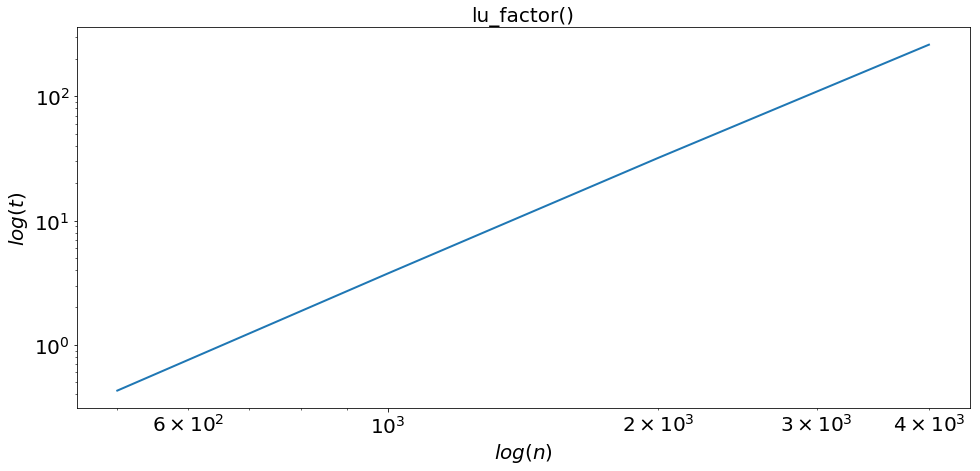

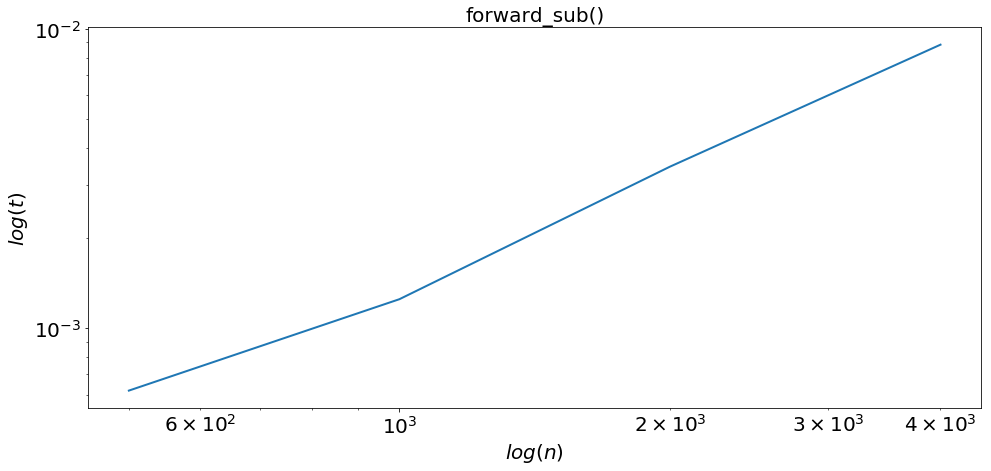

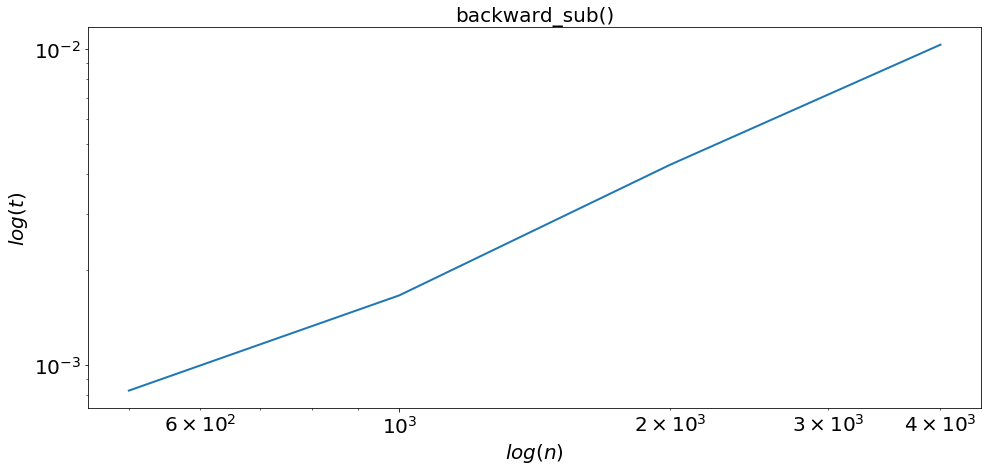

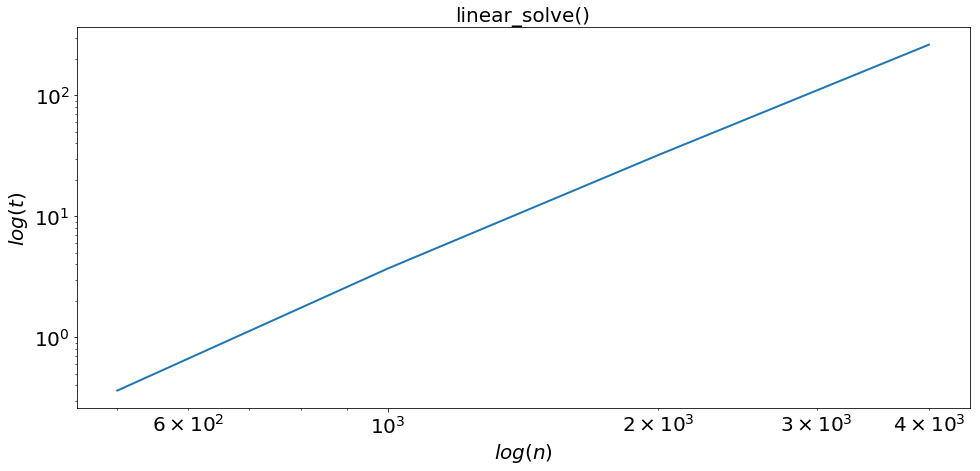

In [10]:
n_list = np.array([500, 1000, 2000, 4000])
results = np.zeros(len(n_list)*4).reshape(4, (len(n_list)))
i = 0
for n in n_list:
    print("n = ", n)
    A = la.hilbert(n)
    b = np.zeros(n)
    # lu_factor
    print("lu_factor()")
    res1= %timeit -o P, LU = lu_factor(A)
    results[0, i] = np.mean(res1.timings)
    # Step 1: Solve Ly = b using forward substitution
    print("forward_sub()")
    P, LU = lu_factor(A)
    res2 = %timeit -o y = forward_sub(LU, b, P) # sort b as P
    results[1, i] = np.mean(res2.timings)
    # Step 2: Solve Ux = y using backward substitution
    print("backward_sub()")
    y = forward_sub(LU, b, P)
    res3 = %timeit -o x = backward_sub(LU, y, P)
    results[2, i] = np.mean(res3.timings)
    # the whole thing
    print("linear_solve()")
    res4 = %timeit -o linear_solve(A, b)
    results[3, i] = np.mean(res4.timings)
    i += 1
    print("-----------------------------------------------------------------------------")

Test_list = np.array(['lu_factor()', 'forward_sub()', 'backward_sub()', 'linear_solve()'])
for j in range(4):
    plt.figure(j)
    plt.title(Test_list[j])
    plt.loglog(n_list, results[j])
    plt.xlabel("$log(n)$")
    plt.ylabel("$log(t)$")
    
    plt.show()

I see that the log-log dependency between $n$ and $t$ is about linear in all chases but ```lu_factor``` and ```linear_solve()``` use alot more time, especially for large $n$. ```forward_sub()``` and ```backward_sub()``` don't use that mush time. From lectures we know that ```lu_factor``` goes as $O(n^3)$, and ```forward_sub()``` and ```backward_sub()``` as $O(n^2)$, so ```linear_solve()``` goes as $O(n^3)$ for large $n$.

In [11]:
# run to show the plots of a prerun run of the code above, by setting to True
if False:
    n_list = np.array([500, 1000, 2000, 4000])
    results = np.array([[4.61020129e-01, 4.28989229e+00, 3.64943890e+01, 2.95273179e+02],
                        [6.37950329e-04, 1.37434544e-03, 3.69055143e-03, 8.99080671e-03],
                        [8.44526114e-04, 1.76658701e-03, 4.21109257e-03, 1.10262830e-02],
                        [4.54547143e-01, 4.27286034e+00, 3.65662469e+01, 2.91582347e+02]])

    print("n = 500 \nlu_factor() \n461 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) \nforward_sub() \n"+
            "638 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) \nbackward_sub() \n"+
            "845 µs ± 94.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) \nlinear_solve() \n"+
            "455 ms ± 5.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) \nn = 1000 \nlu_factor() \n"+
            "4.29 s ± 52.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) \nforward_sub() \n"+
            "1.37 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) \nbackward_sub() \n"+
            "1.77 ms ± 71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each) \nlinear_solve()\n"+
            "4.27 s ± 46.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) \nn = 2000 \nlu_factor()\n"+
            "36.5 s ± 151 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) \nforward_sub() \n"+
            "3.69 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each) \nbackward_sub()\n"+
            "4.21 ms ± 62.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each) \nlinear_solve()\n"+
            "36.6 s ± 186 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) \nn = 4000 \nlu_factor() \n"+
            "4min 55s ± 1.53 s per loop (mean ± std. dev. of 7 runs, 1 loop each) \nforward_sub() \n"+
            "8.99 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each) \nbackward_sub() \n"+
            "11 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 100 loops each) \nlinear_solve() \n"+
            "4min 51s ± 6.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each))")

    Test_list = np.array(['lu_factor()', 'forward_sub()', 'backward_sub()', 'linear_solve()'])
    for j in range(4):
        plt.figure(j + 6)
        plt.title(Test_list[j])
        plt.loglog(n_list, results[j])
        plt.xlabel("$log(n)$")
        plt.ylabel("$log(t)$")

        plt.show()

**b)** Next, define a non-trivial vector $\boldsymbol{b}$ by
$$
b_i = \sum_{j=1}^n (j/(i+j-1)) 
$$
so that the **exact solution** to the lineary system $H_n \boldsymbol{x} = \boldsymbol{b}$ is
the vector $\boldsymbol{x}_{\mathrm{ex}}$  with elements $x_{\mathrm{ex},i} = i$.
Now solve the system using your ```linear_solve``` function for $n = 2, 4, 8, 16$, print the computed solution vector $\boldsymbol{x}_{\mathrm{comp}}$ and compare it with $\boldsymbol{x}_{\mathrm{ex}}$. In particular compute 

$$\|\boldsymbol{x}_{\mathrm{ex}}-\boldsymbol{x}_{\mathrm{comp}}\|_2.$$

What do you observe? Can you explain your observations?

*Hint*: It can be shown that the condition number $\kappa_2(H_n)$ scales like
$$
\kappa_2(H_n) \sim \dfrac{\left(\sqrt{2}+1\right)^{4n+4}}{2^{15/4}\sqrt{\pi n}}
\text{as } n \to  \infty.
$$

Tabulate the approximate values of $\kappa_2(H_n)$ for $n = 2, 4, 8, 16$.

This exercise was heavily inspired by Section 2.8 in **BLUB**.

n =  2
x_ex =  [1. 2.]
x_comp =  [0. 2.]
||x_ex-x_comp||_2 =  1.0
k_2(H_ 2 ) =  1162.4005482739578
--------------------
n =  4
x_ex =  [1. 2. 3. 4.]
x_comp =  [ 1.80966353e-14 -2.03170814e-13  4.90857355e-13  4.00000000e+00]
||x_ex-x_comp||_2 =  3.741657386773652
k_2(H_ 4 ) =  948519.5596462524
--------------------
n =  8
x_ex =  [1. 2. 3. 4. 5. 6. 7. 8.]
x_comp =  [ 3.66418007e-12 -1.92186267e-10  2.45791815e-09 -1.30586664e-08
  3.45969025e-08 -4.82735491e-08  3.39366646e-08  7.99999999e+00]
||x_ex-x_comp||_2 =  11.832159559804943
k_2(H_ 8 ) =  893186722615.2314
--------------------
n =  10
x_ex =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
x_comp =  [ 1.98046124e-09 -1.70057444e-07  3.60516037e-06 -3.26529834e-05
  1.55277027e-04 -4.25775856e-04  6.97064068e-04 -6.72379464e-04
  3.52420417e-04  9.99992261e+00]
||x_ex-x_comp||_2 =  16.881897218345806
k_2(H_ 10 ) =  921918934734649.9
--------------------
n =  16
x_ex =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


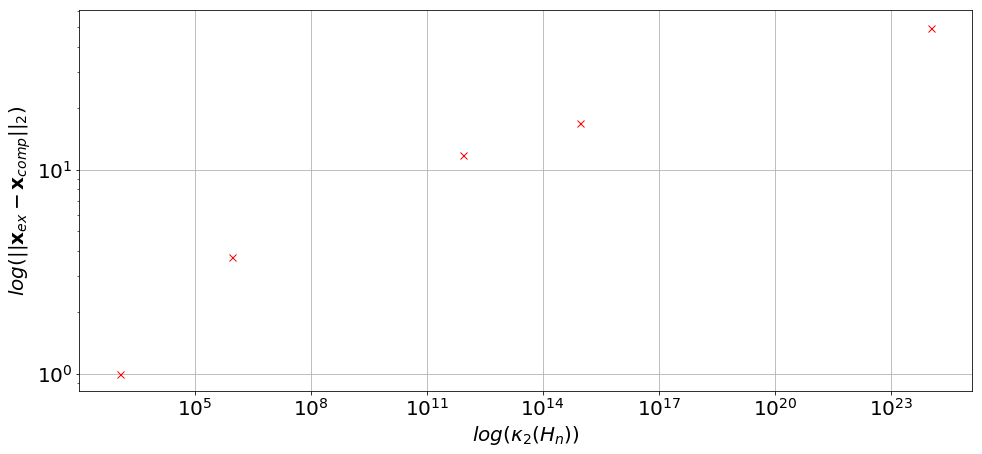

In [12]:
n_list = np.array([2, 4, 8, 10, 16])
dif_list = np.zeros(len(n_list))
k_2H_n_list = np.zeros(len(n_list))
a = 0
for n in n_list:
    print("n = ", n)
    A = la.hilbert(n)
    b = np.zeros(n)
    x_ex = np.zeros(n)
    for i in range(1, n+1):
        x_ex[i-1] = i
        for j in range(1, n+1):
            b[i-1] = j / (i + j - 1)
    # print("A = \n", A)
    # print("b = \n", b)
    x_comp = linear_solve(A, b)
    print("x_ex = ", x_ex)
    print("x_comp = ", x_comp)
    dif = la.norm(x_ex - x_comp, 2)
    dif_list[a] = dif
    print("||x_ex-x_comp||_2 = ", dif)
    k_2H_n = ((np.sqrt(2) + 1) ** (4 * n + 4)) / ((2 ** (15 / 4)) * np.sqrt(np.pi * n) )
    k_2H_n_list[a] = k_2H_n
    print("k_2(H_", n, ") = ", k_2H_n)
    print("--------------------")
    a += 1

plt.figure(5)
plt.loglog(k_2H_n_list, dif_list, 'rx')
plt.grid(True)
plt.ylabel("$log(||\mathbf{x}_{ex}-\mathbf{x}_{comp}||_2)$")
plt.xlabel("$log(\kappa_2 (H_n))$")
plt.show()


I see that as $\kappa_2(H_n)$ gets bigger as $\|\boldsymbol{x}_{\mathrm{ex}}-\boldsymbol{x}_{\mathrm{comp}}\|_2$ gets bigger.